# **DATASET CHECK AND EDA** 

Chosen Tickers are: 
* From stocks: `AMZN`, `FB`, `GOOGL`, `MSFT`, `NVDA`, `TSLA`
* From etfs: `QQQ`

### This notebook will answer some questions

* Where do we see volatility clustering?
* Which ticker looks most valiatile?
* Does 2020-Q1 visually stand out?


### The plots will have 

* Adj close vs Date
* Daily return vs Date
* log(Volume) vs Date 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path 


In [2]:
# ROOT_DIR = Path(os.getcwd())
ROOT_DIR = "d:/Desktop/Data Science Learning/DS Self Projects/IITG Capstone/Stock Market Anomaly Detection/stock-anomaly-detector/"

In [3]:
import os
import sys

# Set the project root directory
project_root = ROOT_DIR

# Change the working directory to the project root
os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}")

# Adding the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# custom imports from src
from src.data.load import load_ticker_csv
from src.data.validate import validate_ohlcv
from src.data.clean_ohlcv import clean_ohlcv


### We import load and validate helper from src 

In [4]:
dfs = {}

TICKER_NAME = ['FB', 'MSFT', 'TSLA', 'GOOGL', 'NVDA', 'AMZN', 'QQQ']
DATA_PATH = ROOT_DIR + "data/raw"
PATH = Path(DATA_PATH) 
for ticker in TICKER_NAME:
    df = load_ticker_csv(PATH / f"{ticker}.csv")
    df, issues = validate_ohlcv(df, strict=False)

    if issues:
        df = clean_ohlcv(df, issues, ticker)
        validate_ohlcv(df, strict=True)
    
    dfs[ticker] = df



[data.load]: ✅ All required columns exist
[data.load]: ✅ All required columns exist
[data.load]: ✅ All required columns exist
[data.load]: ✅ All required columns exist
[data.load]: ✅ All required columns exist
[data.load]: ✅ All required columns exist


2025-12-30 16:23:51,951 - INFO - QQQ | Row Count before: 5301
2025-12-30 16:23:51,954 - INFO - QQQ | Row Count after: 5300
2025-12-30 16:23:51,955 - INFO - QQQ | Reasons:
2025-12-30 16:23:51,957 - INFO - High < max(open, close, low)


[data.load]: ✅ All required columns exist


### Compute Daily Return, Log(Volume)

`daily_return` & `log_volume` columns are for eda and plotting purpose only, not used in model training! 

In [6]:
for k, v in dfs.items():
    df = v
    # adding daily_return column
    df['daily_return'] = df['adj close'].pct_change()

    # adding log volume column
    df['log_volume'] = np.log(df['volume'])

C:\Users\polar\AppData\Local\Temp\ipykernel_5896\2093783377.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['daily_return'] = df['adj close'].pct_change()


In [10]:
# check any ticker with new columns
df = dfs['FB']
df.head()

,date,open,high,low,close,adj close,volume,daily_return,log_volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,20.167402
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.109861,18.940621
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.089039,18.438389
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.032258,18.114156
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.032187,17.732266


## Plots

In [11]:
import matplotlib.pyplot as plt

#### FB - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

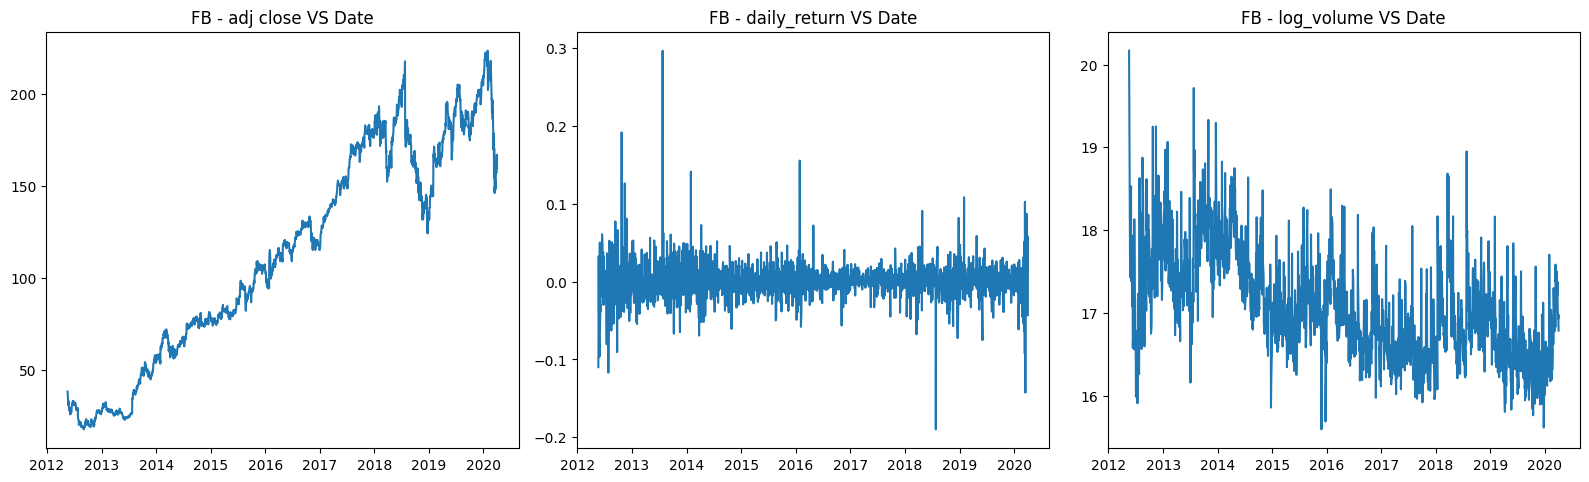

In [54]:
plt.figure(figsize=(16,32))
fb = dfs['FB']
i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

fb = fb.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"{k} - {col} VS Date")
    plt.plot(fb[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### MSFT - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

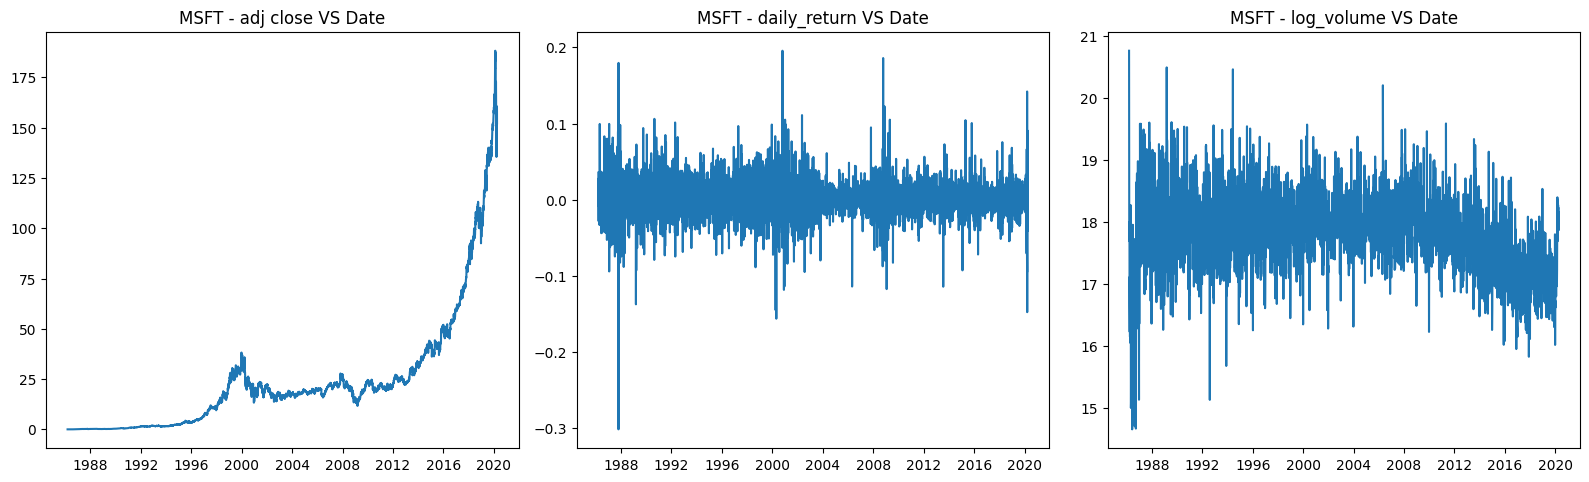

In [59]:
plt.figure(figsize=(16,32))
msft = dfs['MSFT']
i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

msft = msft.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"MSFT - {col} VS Date")
    plt.plot(msft[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### TSLA - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

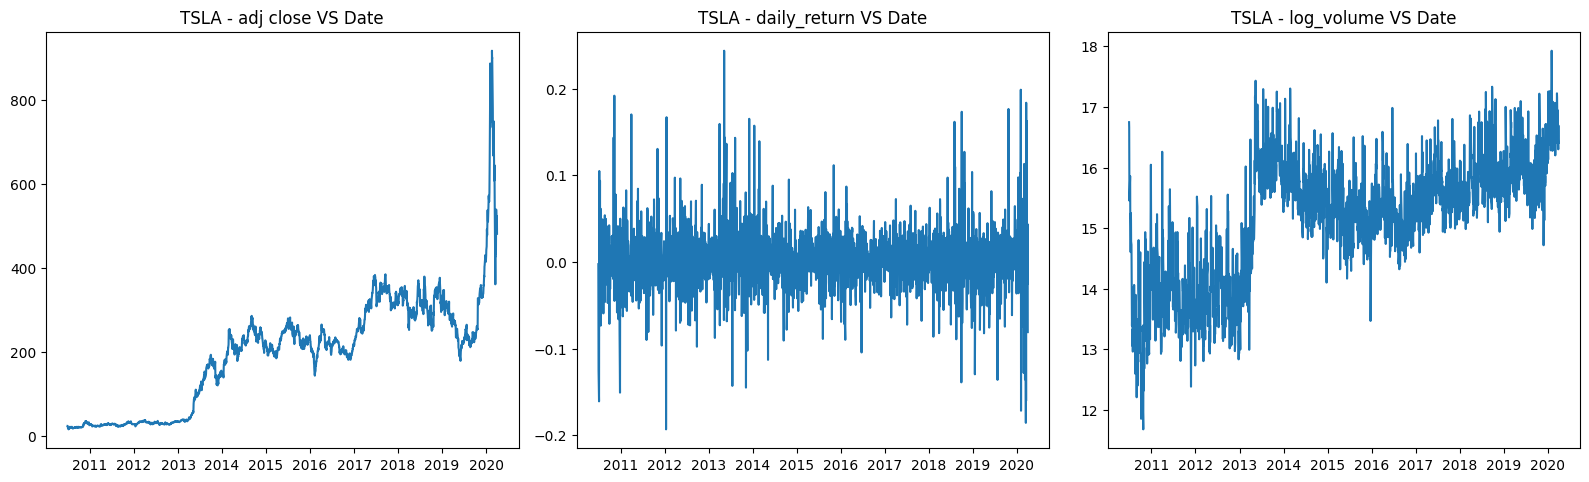

In [60]:
plt.figure(figsize=(16,32))
tsla = dfs['TSLA']

i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

tsla = tsla.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"TSLA - {col} VS Date")
    plt.plot(tsla[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### GOOGL - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

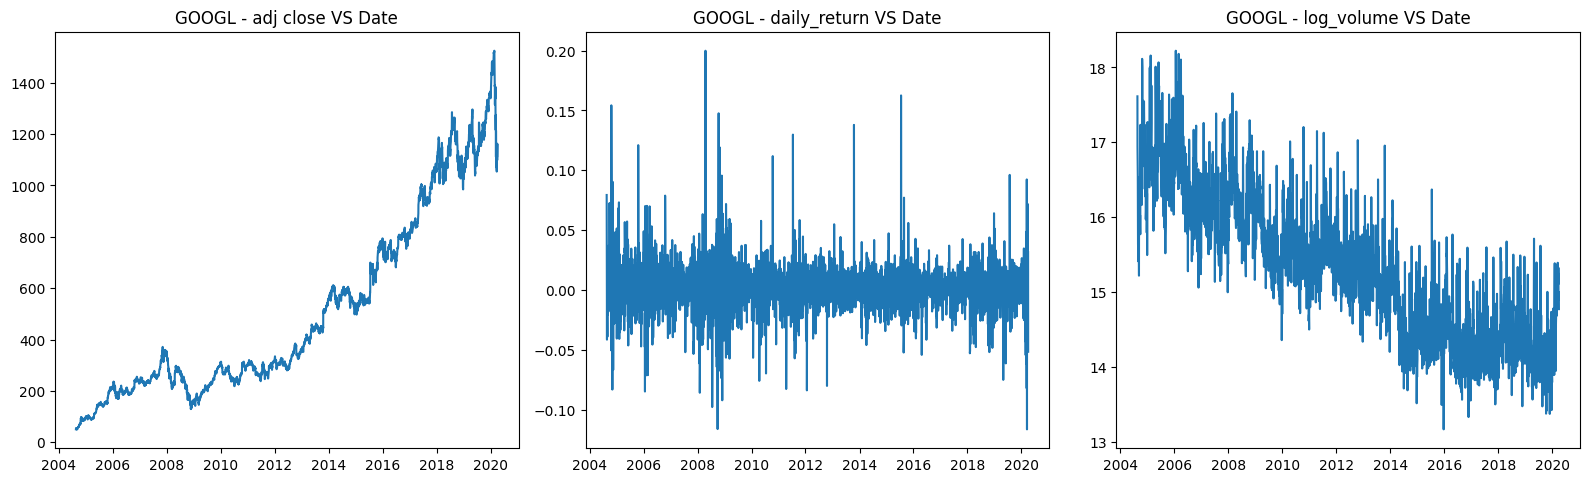

In [62]:
plt.figure(figsize=(16,32))
goog = dfs['GOOGL']

i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

goog = goog.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"GOOGL - {col} VS Date")
    plt.plot(goog[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### NVDA - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

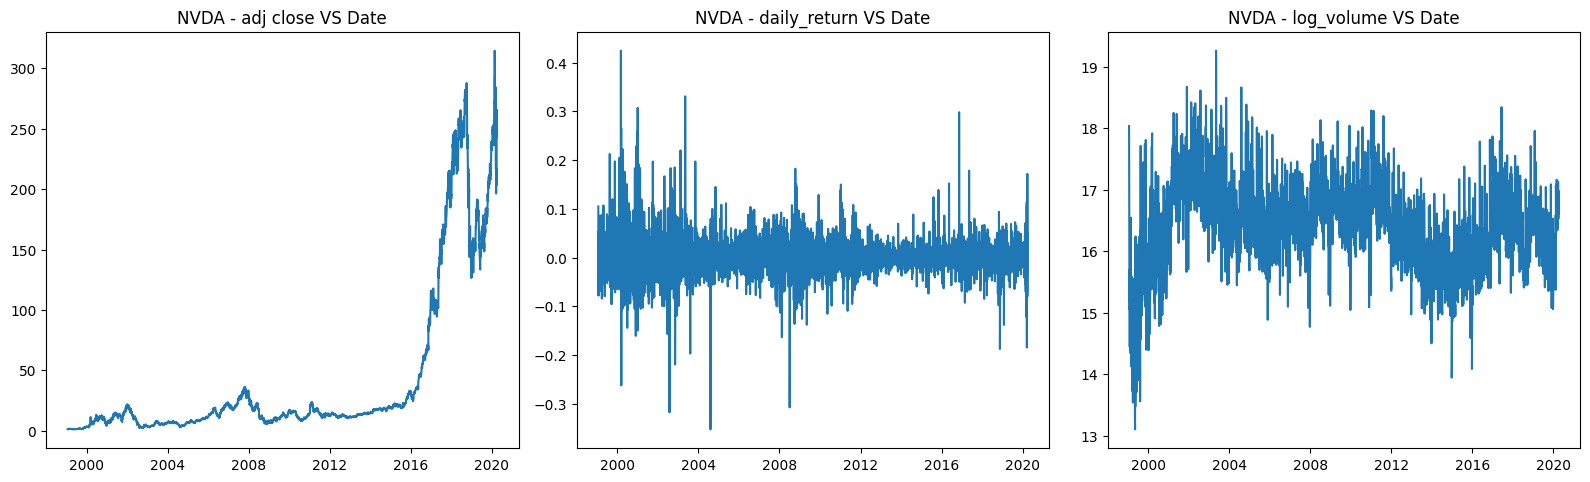

In [63]:
plt.figure(figsize=(16,32))
nvd = dfs['NVDA']

i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

nvd = nvd.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"NVDA - {col} VS Date")
    plt.plot(nvd[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### AMZN - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

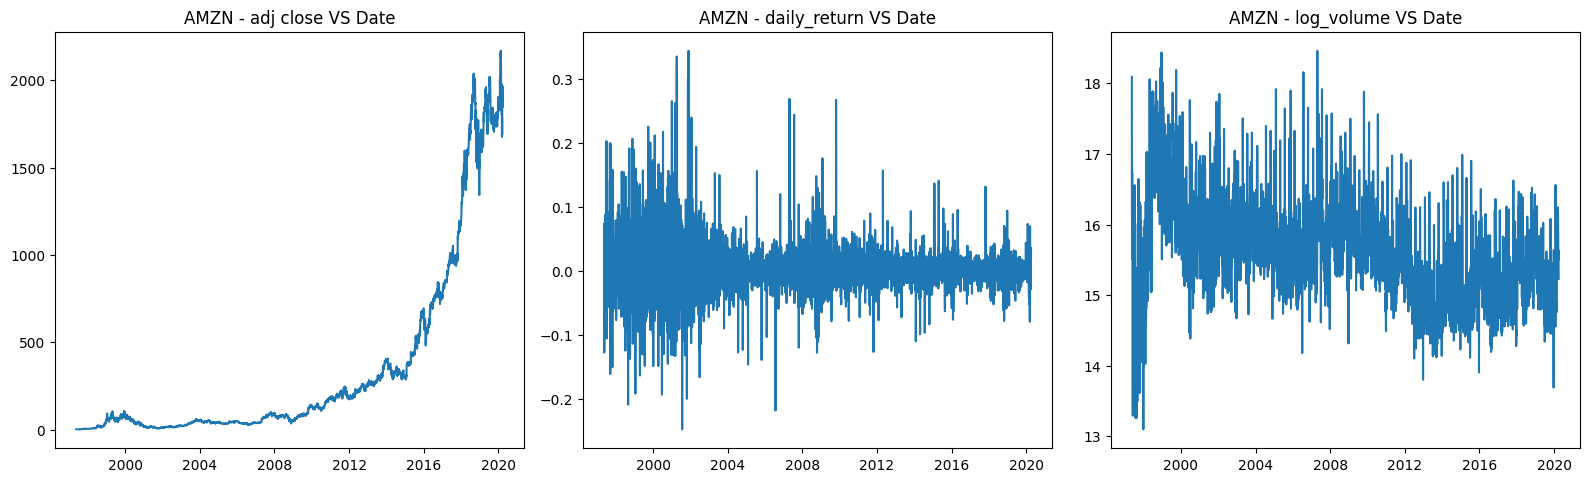

In [64]:
plt.figure(figsize=(16,32))
amzn = dfs['AMZN']

i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

amzn = amzn.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"AMZN - {col} VS Date")
    plt.plot(amzn[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

#### QQQ - Plots

- Adj Close vs Date 
- Daily Return vs Date
- Log volume vs Date

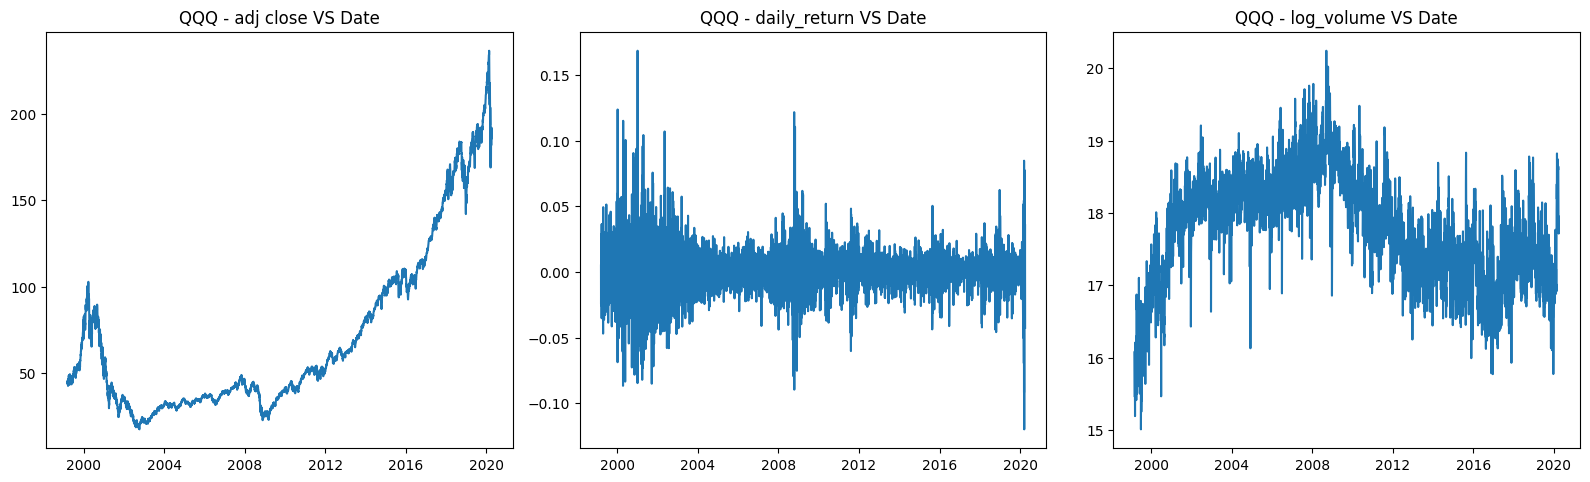

In [65]:
plt.figure(figsize=(16,32))
qqq = dfs['QQQ']

i = 1
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

qqq = qqq.set_index('date')

for col in COL_TO_PLOT:
    plt.subplot(7, 3, i)  # 7 rows, 3 columns
    plt.title(f"QQQ - {col} VS Date")
    plt.plot(qqq[col])
    i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

### All plots together for whole picture

We are now going to answer these questions

* Where do we see volatility clustering?
* Which ticker looks most valiatile?
* Does 2020-Q1 visually stand out?

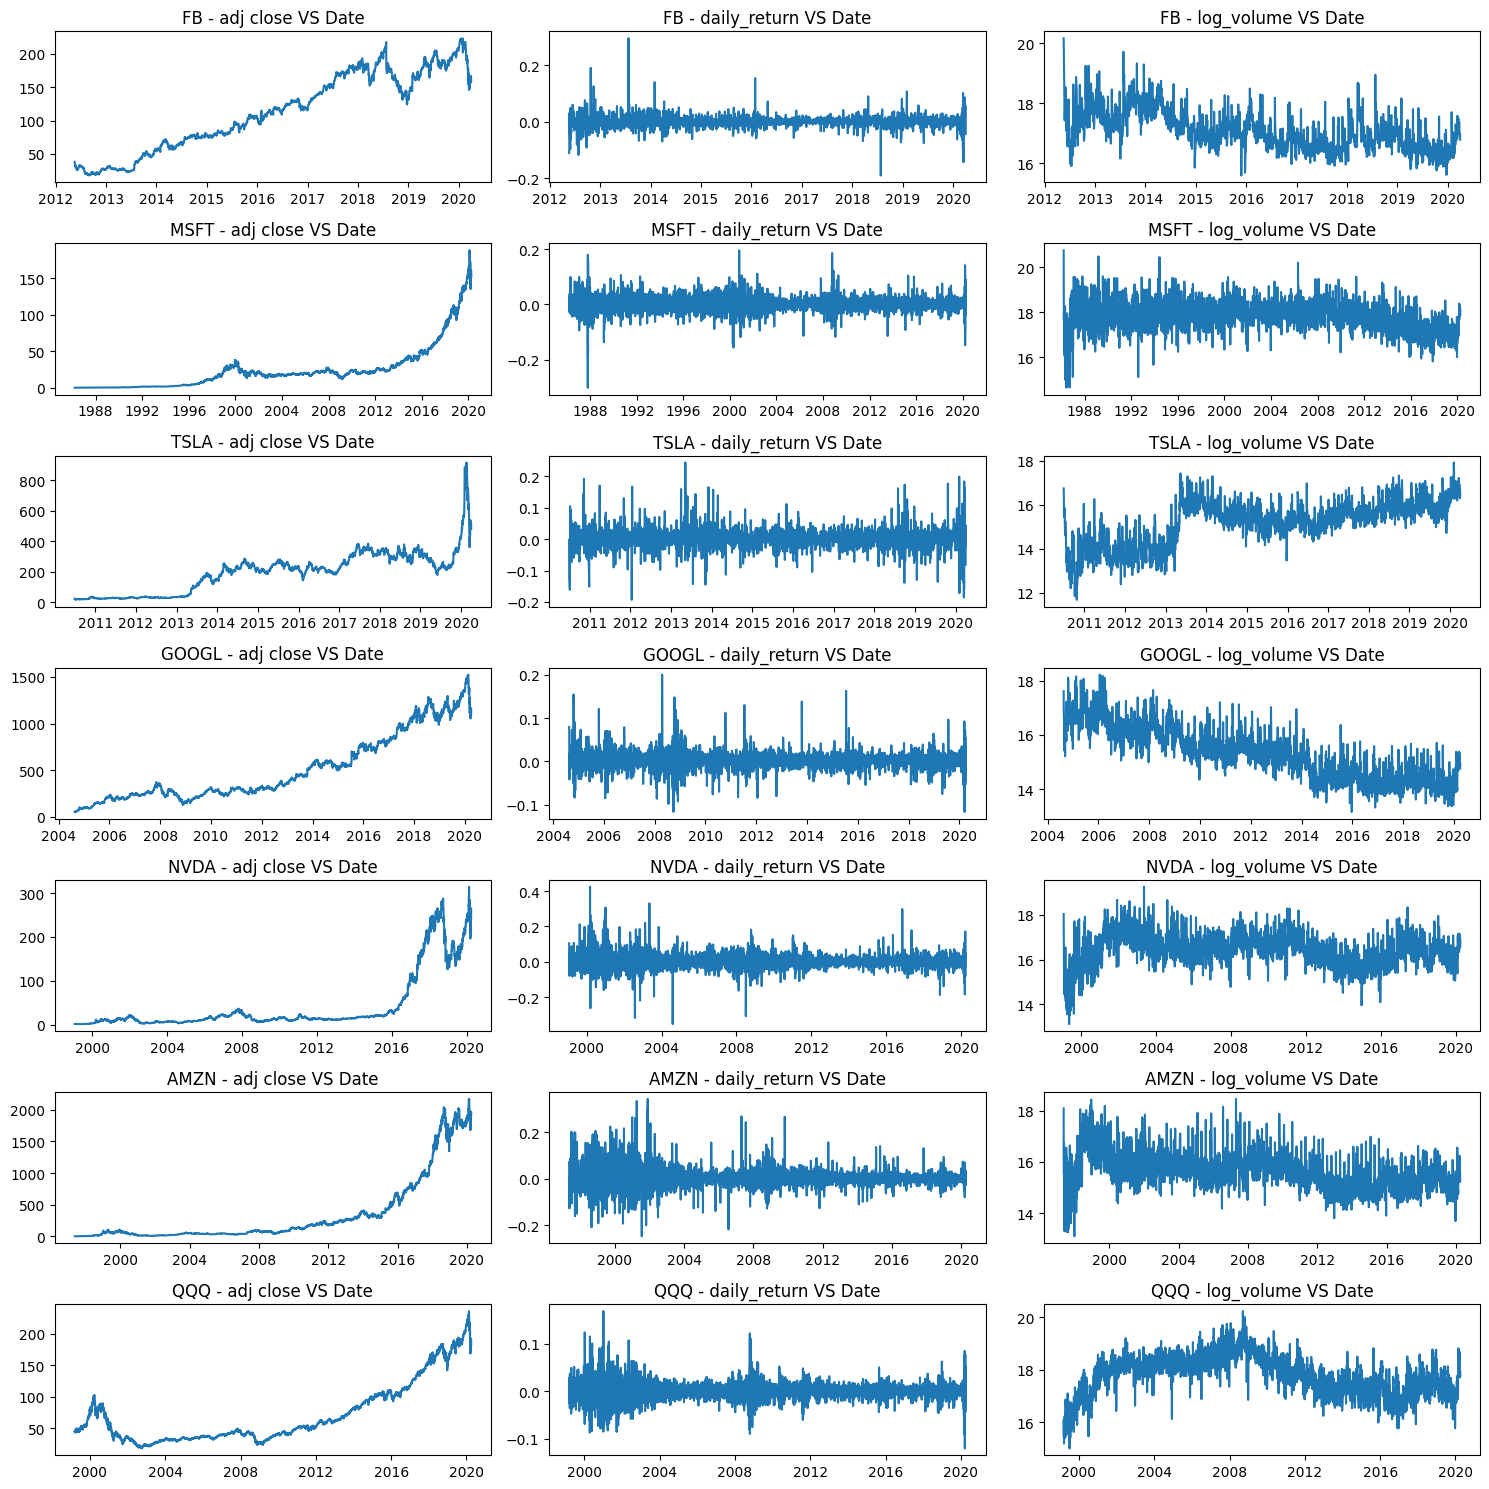

In [69]:
COL_TO_PLOT = ['adj close', 'daily_return', 'log_volume']

# Create a figure with subplots
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

i = 1  # Start the subplot index at 1
for k, df in dfs.items():
    df = df.set_index('date')
    for col in COL_TO_PLOT:
        plt.subplot(7, 3, i)  # 7 rows, 3 columns
        plt.title(f"{k} - {col} VS Date")
        plt.plot(df[col])
        i += 1  # Increment the subplot index

plt.tight_layout()
plt.show()

**Where do we see volatility clustering?**

Volatility clustering is visible across most tickers during known market stress periods, where large-magnitude daily returns occur in consecutive stretches rather than in isolation.

Across the selected universe, clustering is particularly evident during late 2018, parts of 2019, and most strongly during 2020 Q1. In contrast, extended periods of relatively calm behavior are visible between these stress regimes, with smaller and more stable daily returns.

This pattern is consistent with the well-known property of financial time series where volatility tends to persist once elevated. 

---

**Which ticker looks most volatile?**

Among the selected tickers, TSLA appears to be the most volatile, exhibiting the widest range of daily returns and frequent sharp price movements across the time period. GOOGL also shows relatively higher volatility compared to the rest of the universe, though less extreme than TSLA.

In contrast, QQQ displays smoother behavior, reflecting diversification effects at the index level.

---

**Does 2020-Q1 visually stand out?**

Yes, 2020 Q1 clearly stands out across nearly all tickers. The period is characterized by sharp price declines, unusually large daily return magnitudes, and visible increases in trading volume.

The simultaneous appearance of these patterns across multiple tickers highlights a market-wide stress event, making this period particularly suitable for evaluating anomaly detection methods.

## Questions

1. **Why is Adj Close used for returns**

Adjusted close (Adj Close) is used for calculating returns because it accounts for corporate actions like stock splits, dividends, and rights offerings that can affect the stock price. These adjustments ensure that the returns are calculated on a consistent basis over time, reflecting the true performance of the investment without the distortion caused by these events.

---

2. **What happens if you include today in a rolling window?**

This can introduce leakage, as including today in the rolling window calculation will introduce bias that is forward-looking. This can inflate the performance metrics and lead to over-optimistic expectations about the model's predictive capabilities.

---

3. **Why must validation raise errors instead of logging warnings?**

In automated pipelines, errors can halt the process, preventing further steps from running with invalid data. This is crucial for maintaining integrity of the entire process. 